<a href="https://colab.research.google.com/github/ssspetrovic/Image-Classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Klasifikacija slika**
### Naučno istraživanje na temu obučavanja konvolucijske neuronske mreže za klasifikaciju slika iz CIFAR-10 ulaznog skupa podataka

**Autor:** Srđan Petrović IN 47/2020  
**Predmet:** Metode i tehnike nauke o podacima  

*Fakultet tehničkih nauka* <br>
*Univerzitet u Novom Sadu, 2023*


# Instaliranje potrebnih paketa

In [ ]:
# !pip install tensorflow
# !pip install matplotlib
# !pip install opencv-python

# Uvoz neophodnih biblioteka
Osnovne biblioteke iz pređašnje instaliranih paketa, neophodne za formiranje modela i uvoz podataka


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import np_utils
from keras import datasets, layers, models

## Učitavanje skupa podataka putem keras biblioteke

---


- Skup u pitanju: *CIFAR-10*
- Više informacija dostupno na: https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


## Kreiramo niz labela kategorija u redosledu koji je zadat u skupu podata


In [ ]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

## Manipulacija ulaznim skupom podataka
Evo kako izgledaju "sirovi" ulazni podaci

In [ ]:
print("\nPrimer jednog kanala ulazne slike:")
print(train_images[0][0][:3])
print("\nPrimer nekoliko izgleda oblika ulaznih labela:")
print(train_labels[:5])


Primer jednog kanala ulazne slike:
[[59 62 63]
 [43 46 45]
 [50 48 43]]

Primer nekoliko izgleda oblika ulaznih labela:
[[6]
 [9]
 [9]
 [4]
 [1]]


Kako bismo poboljšali performanse modela, normalizujemo vrednosti ulaznih slika tako da budu između 0 i 1 <br>
Razlog deljenja sa 255 jeste taj što vrednosti R, G i B kanala kod svake slike varira od 0 do 255 <br><br>
Takođe, linearizujemo ulazni niz labela jer je nepotrebno zadat u dve dimenzije

In [ ]:
# Normalizovanje RGB vrednosti slika tako da budu u opsegu od 0 do 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Pretvaranje vrednosti labela u jednodimenzionalni niz umesto dvodimenzionalnog
train_labels = train_labels.reshape(-1, )

Podaci nakon manipulacije:

In [ ]:
print("\nPrimer jednog kanala ulazne slike:")
print(train_images[0][0][:3])
print("\nPrimer nekoliko izgleda oblika ulaznih labela:")
print(train_labels[:5])


Primer jednog kanala ulazne slike:
[[0.23137255 0.24313725 0.24705882]
 [0.16862745 0.18039216 0.17647059]
 [0.19607843 0.18823529 0.16862745]]

Primer nekoliko izgleda oblika ulaznih labela:
[6 9 9 4 1]


### Izvlačenje dimenzija i oblika koji će nam trebati pri obučavanju

In [ ]:
num_classes = len(class_names)
train_images_shape = train_images.shape[1:]

### Testiranje iscrtavanja jedne slike
Ispod je jednostavna funkcija koja nam omogućava da iscrtamo jednu sliku putem njenog indeksa u ulaznom skupu podataka

In [ ]:
def sample_plot(images, labels, n, cmap=None):
    fig, axes = plt.subplots(1, n, figsize=(n * 4, 4))
    for i in range(n):
        axes[i].imshow(images[i], cmap=cmap)
        label_index = int(labels[i])
        axes[i].set_xlabel(class_names[label_index], fontsize=13)

Provera iscrtavanja

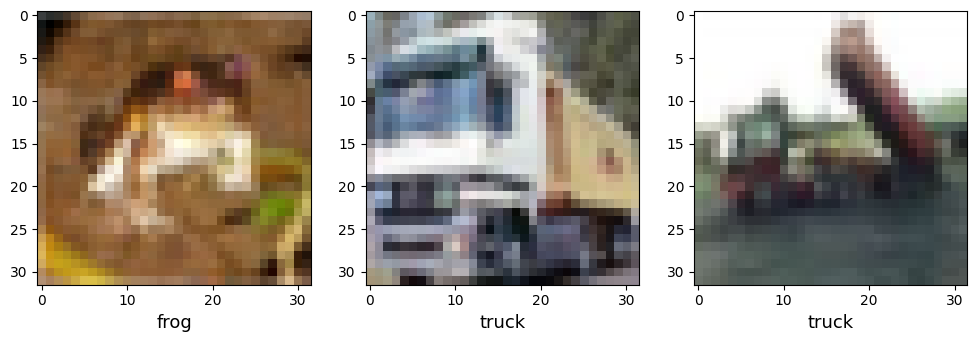

In [ ]:
sample_plot(train_images, train_labels, 3)
plt.show()

# Formiranje modela za obučavanje
Za početni slučaj uzećemo 2 konvoluciona sloja sa po 32 i 64 filtera respektivno, zatim 2 potpuno povezana sloja od po 64 i 10 neurona

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(
        filters=32,
        padding="same",
        kernel_size=(3, 3),
        activation="relu",
        input_shape=train_images_shape
    ),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(
        filters=64,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

Za kompajliranje modela, uzeti su najpopularniji parametri u radu sa konvolucionim neuronskim mrežama


In [ ]:
cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

Kompajliranju modela sledi njegovo obučavanje, zbog eksperimenta uzimamo samo 10 epoha

In [ ]:
cnn.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 21s 6ms/step - loss: 1.3846 - accuracy: 0.5082 - val_loss: 1.0773 - val_accuracy: 0.6264
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9933 - accuracy: 0.6527 - val_loss: 0.9490 - val_accuracy: 0.6721
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8633 - accuracy: 0.6987 - val_loss: 0.8865 - val_accuracy: 0.6953
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7715 - accuracy: 0.7313 - val_loss: 0.8686 - val_accuracy: 0.6965
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6957 - accuracy: 0.7574 - val_loss: 0.8571 - val_accuracy: 0.7086
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6296 - accuracy: 0.7823 - val_loss: 0.8595 - val_accuracy: 0.7058
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5716 - accuracy: 0.7986 - val_loss: 0.8926 - val_accuracy

Nakon obučavanja, možemo evaluirati dobijenu preciznost.

In [ ]:
cnn.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.9895 - accuracy: 0.7117


[0.9895089864730835, 0.7117000222206116]

- Preciznost za obučavanje nad podacima za treniranje iznosi solidnih 84% u poslednjoj epohi <br>
- Međutim, to nije slučaj i sa podacima namenjenim za testiranje. Kod njih možemo videti da preciznost iznosi 70%. To znači da imamo prostora za poboljšanje



# **Optimizacija**

### Dodavanje dodatnih slojeva
Za početak, testiraćemo rezultat nakon dodavanja dodatnih konvolucijskih slojeva i potpuno povezanog sloja u naš model

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(
        filters=32,
        padding="same",
        kernel_size=(3, 3),
        activation="relu",
        input_shape=train_images_shape
    ),

    layers.Conv2D(
        filters=64,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(
        filters=128,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

cnn.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)
cnn.evaluate(test_images, test_labels)

Epoch 1/10
1563/1563 [==============================] - 13s 6ms/step - loss: 1.3371 - accuracy: 0.5152 - val_loss: 0.9717 - val_accuracy: 0.6607
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8765 - accuracy: 0.6937 - val_loss: 0.8299 - val_accuracy: 0.7127
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7128 - accuracy: 0.7514 - val_loss: 0.8185 - val_accuracy: 0.7223
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6017 - accuracy: 0.7907 - val_loss: 0.7683 - val_accuracy: 0.7421
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5053 - accuracy: 0.8239 - val_loss: 0.7869 - val_accuracy: 0.7389
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4237 - accuracy: 0.8499 - val_loss: 0.8135 - val_accuracy: 0.7433
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3508 - accuracy: 0.8771 - val_loss: 0.9097 - val_accur

[1.1702419519424438, 0.7111999988555908]

Dodavanje još jednog konvolucionog sloja i jednog Dense sloja značajno poboljšava rezultat kako preciznosti nad podacima za treniranje tako i na nepoznatim podacima za testiranje. <br>
Sada preciznost nad podacima za obučavanje iznosi 92%, dok na podacima za testiranje iznosi 71%

### Dodavanje Dropout slojeva
Dropout slojevi nam pomažu kako bismo sprečili *overfitting* <br>
To se postiže tako što se odrežen procenat ulaznih parametara (u ovom slučaju 30%) resetuje na 0 tokom treniranja kako bismo smanjili pristrasnost modela tako da ne zavisi previše od ulaznih podataka

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(
        filters=32,
        padding="same",
        kernel_size=(3, 3),
        activation="relu",
        input_shape=train_images_shape
    ),
    layers.Dropout(0.2),

    layers.Conv2D(
        filters=64,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.Dropout(0.2),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(
        filters=128,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.Dropout(0.2),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation="softmax")
])

cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

cnn.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)
cnn.evaluate(test_images, test_labels)

Epoch 1/10
1563/1563 [==============================] - 15s 8ms/step - loss: 1.6779 - accuracy: 0.3818 - val_loss: 1.3276 - val_accuracy: 0.5298
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2839 - accuracy: 0.5409 - val_loss: 1.0893 - val_accuracy: 0.6332
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1141 - accuracy: 0.6096 - val_loss: 0.9771 - val_accuracy: 0.6684
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0104 - accuracy: 0.6492 - val_loss: 0.9243 - val_accuracy: 0.6964
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9425 - accuracy: 0.6720 - val_loss: 0.8898 - val_accuracy: 0.7047
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8983 - accuracy: 0.6915 - val_loss: 0.8310 - val_accuracy: 0.7202
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8538 - accuracy: 0.7046 - val_loss: 0.8298 - val_ac

[0.8036856651306152, 0.7330999970436096]

Možemo primetiti kako Dropout layer ima doprinos obučavanju.<br>
Međutim, ukoliko povećamo broj filtera i neurona na način ispod, rezultat se još poboljšava jer smanjujemo underfitting.

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(
        filters=64,
        padding="same",
        kernel_size=(3, 3),
        activation="relu",
        input_shape=train_images_shape
    ),
    layers.Dropout(0.3),

    layers.Conv2D(
        filters=128,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.Dropout(0.2),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(
        filters=256,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.Dropout(0.3),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")
])

cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

cnn.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)
cnn.evaluate(test_images, test_labels)

Epoch 1/10
1563/1563 [==============================] - 25s 14ms/step - loss: 1.4724 - accuracy: 0.4624 - val_loss: 1.1939 - val_accuracy: 0.5856
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0423 - accuracy: 0.6354 - val_loss: 0.9257 - val_accuracy: 0.6893
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8876 - accuracy: 0.6900 - val_loss: 0.8471 - val_accuracy: 0.7131
Epoch 4/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.7920 - accuracy: 0.7233 - val_loss: 0.7883 - val_accuracy: 0.7317
Epoch 5/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.7164 - accuracy: 0.7505 - val_loss: 0.7509 - val_accuracy: 0.7434
Epoch 6/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.6511 - accuracy: 0.7739 - val_loss: 0.7595 - val_accuracy: 0.7336
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6078 - accuracy: 0.7865 - val_loss: 0.7528 -

[0.7404052019119263, 0.7487999796867371]

Sada u poslednjoj epohi imamo preciznosti 82% na podacima za obučavanje, dok podaci za testiranje daju preciznost od 75%.

Malim korigovanjem Dropout frakcije možemo još više poboljšati preciznost

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(
        filters=64,
        padding="same",
        kernel_size=(3, 3),
        activation="relu",
        input_shape=train_images_shape
    ),
    layers.Dropout(0.2),

    layers.Conv2D(
        filters=128,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.Dropout(0.2),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(
        filters=256,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.Dropout(0.2),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")
])

cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

cnn.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)
cnn.evaluate(test_images, test_labels)

Epoch 1/10
1563/1563 [==============================] - 25s 14ms/step - loss: 1.4960 - accuracy: 0.4541 - val_loss: 1.0975 - val_accuracy: 0.6361
Epoch 2/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0588 - accuracy: 0.6304 - val_loss: 0.9558 - val_accuracy: 0.6724
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9096 - accuracy: 0.6828 - val_loss: 0.8601 - val_accuracy: 0.7078
Epoch 4/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8095 - accuracy: 0.7174 - val_loss: 0.8055 - val_accuracy: 0.7300
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7423 - accuracy: 0.7418 - val_loss: 0.8130 - val_accuracy: 0.7234
Epoch 6/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6785 - accuracy: 0.7651 - val_loss: 0.7423 - val_accuracy: 0.7426
Epoch 7/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.6337 - accuracy: 0.7788 - val_loss: 0.7741 -

[0.7069482207298279, 0.7592999935150146]

Sada ona iznosi dobrih 76% što se tiče podataka za testiranje

### Obučavanja na većem broju epoha
Kada smo optimalno podesili parametre, možemo pustiti model da se obučava na većem broju epoha.<br>
Nakon toga možemo vizuelno testirati kako model vrši predikciju.

In [ ]:
cnn.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=20)
cnn.evaluate(test_images, test_labels)

Epoch 1/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.4897 - accuracy: 0.8313 - val_loss: 0.7278 - val_accuracy: 0.7520
Epoch 2/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.4679 - accuracy: 0.8387 - val_loss: 0.7080 - val_accuracy: 0.7599
Epoch 3/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.4506 - accuracy: 0.8424 - val_loss: 0.7084 - val_accuracy: 0.7621
Epoch 4/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4320 - accuracy: 0.8513 - val_loss: 0.7120 - val_accuracy: 0.7621
Epoch 5/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.4085 - accuracy: 0.8596 - val_loss: 0.7526 - val_accuracy: 0.7536
Epoch 6/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.3968 - accuracy: 0.8634 - val_loss: 0.7190 - val_accuracy: 0.7613
Epoch 7/20
1563/1563 [==============================] - 24s 16ms/step - loss: 0.3862 - accuracy: 0.8671 - val_loss: 0.7185 -

[0.7629721760749817, 0.7692000269889832]

Sada vidimo da preciznost modela iznosi solidnih 77%.

# Testiranje predikcije
Sada ćemo testirati kako naš model vrši predikciju korišćenjem 10 slika iz hrpe za testiranje.

313/313 [==============================] - 1s 4ms/step
['cat', 'ship', 'airplane', 'airplane', 'frog', 'frog', 'automobile', 'deer', 'cat', 'automobile']



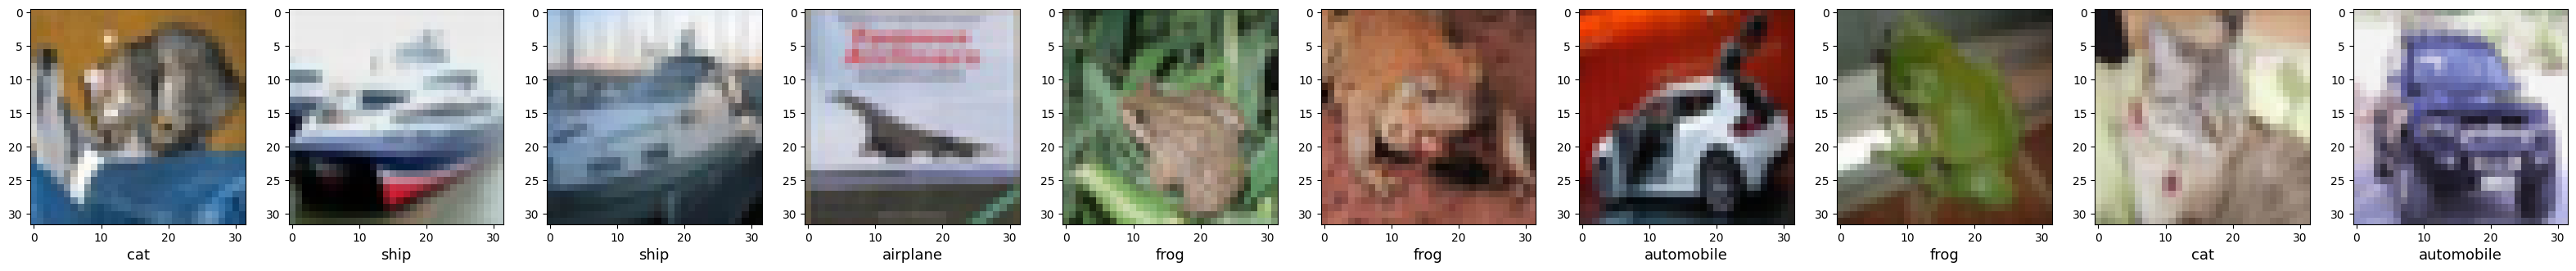

In [ ]:
test_prediction = cnn.predict(test_images)
test_prediction = test_prediction[:10]
test_classes = [class_names[np.argmax(i)] for i in test_prediction]

print(test_classes)
print()

sample_plot(test_images, test_labels, 10)
plt.show()

# Prethodna obrada slika pomoću OpenCV
Uvoz biblioteke


In [ ]:
import cv2

## 1. Grayscale
Funkcija za pretvaranje piksela u grayscale oblik

In [ ]:
def grayscale(images):
    preprocessed_images = []
    for image in images:
        image_uint8 = np.uint8(image * 255)
        grayscale_image = cv2.cvtColor(image_uint8, cv2.COLOR_RGB2GRAY)
        preprocessed_images.append(grayscale_image)
    return np.array(preprocessed_images)

Primena funkcije na slikama za treniranje i testiranje

In [ ]:
grayscale_train_images = grayscale(train_images)
grayscale_test_images = grayscale(test_images)

Prikaz slika nakon primene filtera:

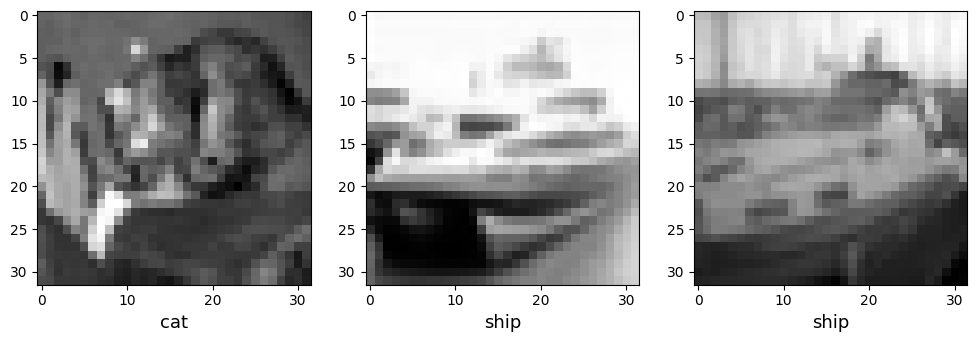

In [ ]:
sample_plot(grayscale_test_images, test_labels, 3, cmap="gray")
plt.show()

Pravljenje novog modela zbog izmenjenih dimenzija ulaznih slika:


In [ ]:
cnn_gray = models.Sequential([
    layers.Conv2D(
        filters=64,
        padding="same",
        kernel_size=(3, 3),
        activation="relu",
        input_shape=(32, 32, 1)  # Input shape for grayscale images
    ),
    layers.Dropout(0.2),

    layers.Conv2D(
        filters=128,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.Dropout(0.2),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(
        filters=256,
        padding="same",
        kernel_size=(3, 3),
        activation="relu"
    ),
    layers.Dropout(0.2),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")
])


cnn_gray.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

## Obučavanje i evaluacija novodobijenog modela

In [ ]:
cnn_gray.fit(grayscale_train_images, train_labels, validation_data=(grayscale_test_images, test_labels), epochs=20)
cnn_gray.evaluate(grayscale_test_images, test_labels)

Epoch 1/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.6526 - accuracy: 0.4127 - val_loss: 1.6042 - val_accuracy: 0.4653
Epoch 2/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3729 - accuracy: 0.5220 - val_loss: 1.3863 - val_accuracy: 0.5278
Epoch 3/20
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2170 - accuracy: 0.5806 - val_loss: 1.1328 - val_accuracy: 0.6222
Epoch 4/20
1563/1563 [==============================] - 21s 14ms/step - loss: 1.1103 - accuracy: 0.6187 - val_loss: 1.1173 - val_accuracy: 0.6326
Epoch 5/20
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0465 - accuracy: 0.6413 - val_loss: 1.0226 - val_accuracy: 0.6584
Epoch 6/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.9780 - accuracy: 0.6656 - val_loss: 0.9729 - val_accuracy: 0.6771
Epoch 7/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9294 - accuracy: 0.6830 - val_loss: 0.9774 -

[0.9649967551231384, 0.6816999912261963]

## Rezultati grayscale obrade
Rezultati treniranja na grayscale skupu podataka nisu bolji od običnog<br>
Moja pretpostavka je zato što su slike male, i postoji dosta mešanja pozadina i samim tim stapanja kontrasta, tako da to negativno utiče na prepoznavanje karakteristika prilikom treniranja

## Testiranje predikcije
Testiranje predikcije, sada na grayscale verzijama slika.

313/313 [==============================] - 1s 3ms/step
['cat', 'airplane', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'deer', 'cat', 'ship']



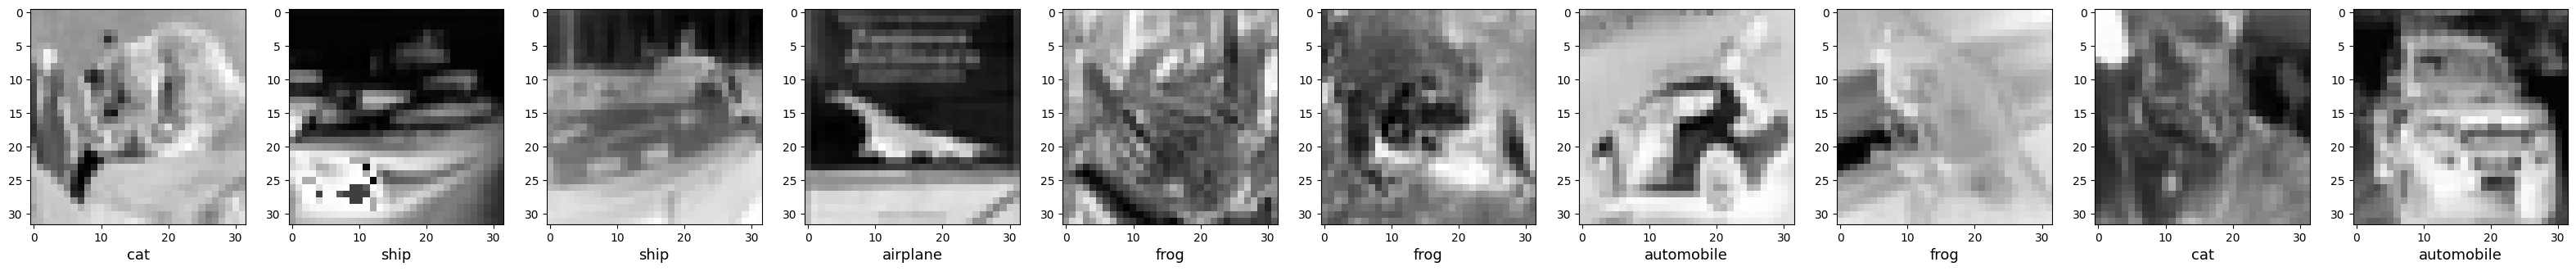

In [ ]:
grayscale_test_prediction = cnn_gray.predict(grayscale_test_images)
grayscale_test_prediction = grayscale_test_prediction[:10]
grayscale_test_classes = [class_names[np.argmax(i)] for i in grayscale_test_prediction]

print(grayscale_test_classes)
print()

sample_plot(grayscale_test_images, test_labels, 10, cmap="gray")
plt.show()

## 2. Nasumična rotacija
Funkcija koja nasumično vrši rotaciju po horizontalnoj osi kao i rotiranje slike za nasumičan broj stepeni između $\pm$90.

In [ ]:
def augment(images):
    augmented_images = []
    for image in images:
        if np.random.rand() < 0.5:
            image = cv2.flip(image, 1)

        angle = np.random.randint(-90, 90)
        rows, cols, _ = image.shape
        rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
        image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

        augmented_images.append(image)
    
    return np.array(augmented_images)


Primena efekta na ulaznom skupu slika

In [ ]:
augmented_train_images = augment(train_images)
augmented_test_images = augment(test_images)

Iscrtavanje slika nakon izmena

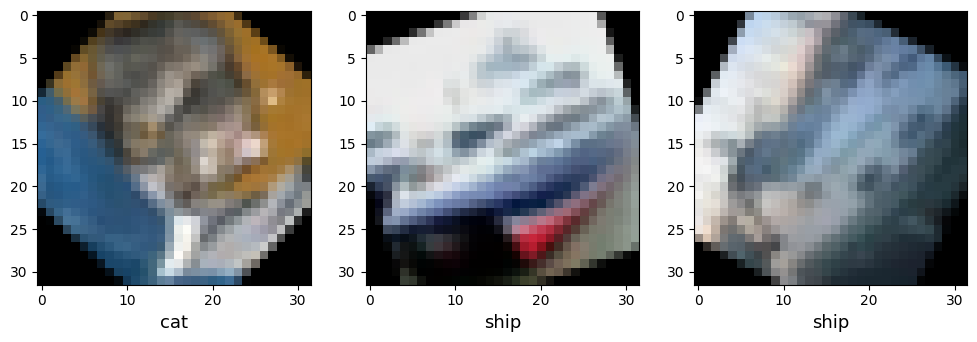

In [ ]:
sample_plot(augmented_test_images, test_labels, 3)
plt.show()

### Treniranje modela na izmenjenim slikama

In [ ]:
cnn.fit(augmented_train_images, train_labels, validation_data=(augmented_test_images, test_labels), epochs=20)
cnn.evaluate(augmented_test_images, test_labels)

Epoch 1/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5707 - accuracy: 0.4564 - val_loss: 1.4078 - val_accuracy: 0.5082
Epoch 2/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3340 - accuracy: 0.5331 - val_loss: 1.3219 - val_accuracy: 0.5591
Epoch 3/20
1563/1563 [==============================] - 21s 14ms/step - loss: 1.2260 - accuracy: 0.5711 - val_loss: 1.3184 - val_accuracy: 0.5539
Epoch 4/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1390 - accuracy: 0.5984 - val_loss: 1.1679 - val_accuracy: 0.5999
Epoch 5/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0549 - accuracy: 0.6353 - val_loss: 1.1572 - val_accuracy: 0.5980
Epoch 6/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9876 - accuracy: 0.6597 - val_loss: 1.1099 - val_accuracy: 0.6263
Epoch 7/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9200 - accuracy: 0.6786 - val_loss: 1.1465 -

[1.1188666820526123, 0.6402999758720398]

## Rezultati obrade nasumičnom rotacijom
Rezultati obrade su nešto lošiji od grayscale rezultata, ali to je na neki način očekivano zbog nasumičnih modifikacija slika tokom obučavanja. <br>
Na iscrtavanju slika se takođe može videti da je prisutno gubljenje određenog dela slike prilikom njene rotacije.

